<a href="https://colab.research.google.com/github/l-longo/A_neural_network_ensemble_approach_for_GDP_forecasting/blob/main/dfm_gas%2B1_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *DFM-GAS one quarter ahead prediction*

Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.optimize import minimize
from scipy.stats import norm
from google.colab import files

Define estimation function:

In [2]:
def MLE_GAS(par, data, out = None):
    T = len(data)
    gamma=par[0]
    beta1=par[1]
    beta2=par[2]
    s2=par[3]
    y=data[:,0]
    f1=data[:,1]
    f2=data[:,2]
    s=np.zeros(T)
    err = np.zeros(T)
    #Sc=np.zeros(T)
    alpha=np.zeros(T)
    alpha[0]=0.5
    for t in range(1,T):
        #Sc[t-1] = s2
        s[t-1] = (y[t-1] - alpha[t-1] - beta1*f1[t-1] - beta2*f2[t-1])/s2
        alpha[t] = gamma*s[t-1] + alpha[t-1]
    
    err = y - alpha - beta1*f1 - beta2*f2
    lls = np.log(2*np.pi)/2 + np.log(s2) + 1/(2*s2)*(err**2)
    ll = - (T/2)*np.log(2*np.pi) - T/2*np.log(s2) - 1/(2*s2)*np.sum(err**2)
    if out is None:
        return -ll
    else:
        return -ll,lls,s2

Import factors estimated through PCA for the whole out-of-sample window, using monthly indicators

In [3]:
uploaded = files.upload()
fcts=pd.read_excel('fcts1io.xlsx',sheet_name='pred',index_col=0)
gdp=pd.read_excel('gdp.xlsx',sheet_name='Sheet1',index_col=0)
gdp = gdp[gdp.index>'1970-01-01']
fcts = fcts[fcts.index>1]
fcts1=fcts.to_numpy()
R = np.size(fcts1[:,0])
C = np.size(fcts1[0,:])
ft=np.zeros((145,C))
gdp_train=gdp[gdp.index<'2005-05-01']
gdp_test=gdp[gdp.index>'2005-04-01']
Tr=np.size(gdp_train)
gdp_train = gdp_train.dropna()
gdp_tr = gdp_train.to_numpy()

Saving fcts1io.xlsx to fcts1io.xlsx
Saving gdp.xlsx to gdp.xlsx


Transform monthly factors to quarterly factors:

In [4]:
for j in range(C):
    c = np.reshape(fcts1[:,j], (145,3))
    for i in range(145):
        ft[i,j] = (c[i,2])

In [5]:
data=np.hstack(((gdp_train.to_numpy()),ft[:141,0:2]))

b =  5 #initial values chosen via grid-search algorithm
   
par=([b*0.04+0.1, 1.9, 1.9, 2])
loglik = minimize(MLE_GAS, par, method='SLSQP', args=data,
                  bounds = [(0,None),(None,None),
                            (None,None),(None,None)],options={'disp': True,'ftol':1e-10})
estimates = loglik.x   
gamma=estimates[0]
beta1=estimates[1]
beta2=estimates[2]
s2=estimates[3]


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 333.89329696447305
            Iterations: 19
            Function evaluations: 130
            Gradient evaluations: 19


Forecast via extending-window:

In [6]:
sz_oos = 141
F = ft[sz_oos,:354]
F = np.reshape(F, (177,2))
gdp_test.insert(loc=1,column='F1',value=F[:,0])
gdp_test.insert(loc=2,column='F2',value=F[:,1])
gdp_test = gdp_test.dropna()
dt = gdp_test.to_numpy()

predicted=np.zeros(59)
tv_mean = np.zeros(59)

data_full = np.vstack((data,dt))

for i in range(np.size(predicted)):
    
    if i<=8:
        y = data_full[i:sz_oos+i,0]
        f1 = data_full[i:sz_oos+i,1]
        f2 = data_full[i:sz_oos+i,2]
    elif 8<i<=16:
        b =  5 #initial values chosen via grid-search algorithm
        par=([b*0.04+0.1, 1.9, 1.9, 2])
        loglik = minimize(MLE_GAS, par, method='SLSQP', args=data_full[:sz_oos+8,:],
                          bounds = [(0,None),(None,None),
                                    (None,None),(None,None)],options={'disp': True,'ftol':1e-10})
        estimates = loglik.x   
        gamma=estimates[0]
        beta1=estimates[1]
        beta2=estimates[2]
        s2=estimates[3]
    elif 16<i<=24:
        b =  5 #initial values chosen via grid-search algorithm
        par=([b*0.04+0.1, 1.9, 1.9, 2])
        loglik = minimize(MLE_GAS, par, method='SLSQP', args=data_full[:sz_oos+16,:],
                          bounds = [(0,None),(None,None),
                                    (None,None),(None,None)],options={'disp': True,'ftol':1e-10})
        estimates = loglik.x   
        gamma=estimates[0]
        beta1=estimates[1]
        beta2=estimates[2]
        s2=estimates[3]
    
    elif 24<i<=32:
        b =  5 #initial values chosen via grid-search algorithm
        par=([b*0.04+0.1, 1.9, 1.9, 2])
        loglik = minimize(MLE_GAS, par, method='SLSQP', args=data_full[:sz_oos+24,:],
                          bounds = [(0,None),(None,None),
                                    (None,None),(None,None)],options={'disp': True,'ftol':1e-10})
        estimates = loglik.x   
        gamma=estimates[0]
        beta1=estimates[1]
        beta2=estimates[2]
        s2=estimates[3]
    
    elif 32<i<=40:
        b =  5 #initial values chosen via grid-search algorithm
        par=([b*0.04+0.1, 1.9, 1.9, 2])
        loglik = minimize(MLE_GAS, par, method='SLSQP', args=data_full[:sz_oos+32,:],
                          bounds = [(0,None),(None,None),
                                    (None,None),(None,None)],options={'disp': True,'ftol':1e-10})
        estimates = loglik.x   
        gamma=estimates[0]
        beta1=estimates[1]
        beta2=estimates[2]
        s2=estimates[3]
    
    elif 40<i<=48:
        b =  5 #initial values chosen via grid-search algorithm
        par=([b*0.04+0.1, 1.9, 1.9, 2])
        loglik = minimize(MLE_GAS, par, method='SLSQP', args=data_full[:sz_oos+40,:],
                          bounds = [(0,None),(None,None),
                                    (None,None),(None,None)],options={'disp': True,'ftol':1e-10})
        estimates = loglik.x   
        gamma=estimates[0]
        beta1=estimates[1]
        beta2=estimates[2]
        s2=estimates[3]
    
    else:
        b =  5 #initial values chosen via grid-search algorithm
        par=([b*0.04+0.1, 1.9, 1.9, 2])
        loglik = minimize(MLE_GAS, par, method='SLSQP', args=data,
                          bounds = [(0,None),(None,None),
                                    (None,None),(None,None)],options={'disp': True,'ftol':1e-10})
        estimates = loglik.x   
        gamma=estimates[0]
        beta1=estimates[1]
        beta2=estimates[2]
        s2=estimates[3]

    
    T = np.size(data[:,0])+1
    s=np.zeros(T)
    alpha=np.zeros(T)
    alpha[0]=np.mean(data[:,0])
    y = data_full[i:141+i,0]
    f1 = data_full[i:141+i,1]
    f2 = data_full[i:141+i,2]
    #f1 = data_full[0:141,1]
    #f2 = data_full[0:141,2]
    for t in range(1,T):
        s[t-1] = (y[t-1] - alpha[t-1] - beta1*f1[t-1] - beta2*f2[t-1])/s2
        alpha[t] =  gamma*s[t-1] + alpha[t-1]
    
    predicted[i] = alpha[T-1] + beta1*F[i,0] + beta2*F[i,1]
    tv_mean[i] = alpha[T-1]    

gdp_test.insert(loc=1,column='pred',value=predicted) 


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 350.490220899144
            Iterations: 21
            Function evaluations: 140
            Gradient evaluations: 21
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 350.490220899144
            Iterations: 21
            Function evaluations: 140
            Gradient evaluations: 21
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 350.490220899144
            Iterations: 21
            Function evaluations: 140
            Gradient evaluations: 21
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 350.490220899144
            Iterations: 21
            Function evaluations: 140
            Gradient evaluations: 21
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 350.490220899144
            Iterations: 21
            Function eval

Out-of-sample fit of the DFM-GAS:


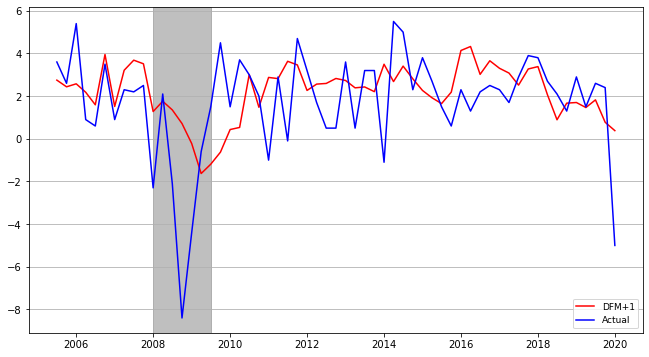

In [8]:
date = gdp_test.index
fig, ax = plt.subplots(figsize = (11, 6))
ax.plot(gdp_test['pred'],'r', label='DFM+1')
ax.plot(gdp_test['GDPR'],'blue', label='Actual')
ax.yaxis.grid(True) # only horizontal grid
ax.legend(fontsize = 9, loc = 'lower right')
ax.axvspan(date[10],date[16],color = 'gray', alpha = .5, zorder = -1)
plt.show()